In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from scipy import optimize

plt.rc('font',size=12)
plt.rc('legend',fontsize=10)

In [6]:
# load results
with open('result.dat','rb') as f:
    data=pickle.load(f)
    (c_atps,trans_atp,hydr_atp,
    c_adps,trans_adp,hydr_adp,
    c_atpgss,trans_atpgs,hydr_atpgs,
    c_atpgss2,trans_atpgs2,hydr_atpgs2,
    c_atps_lobs,trans_atp_lobs,hydr_atp_lobs,
    c_atps_hobs,trans_atp_hobs,hydr_atp_hobs,
    e_subs,trans_force,hydr_force)=data

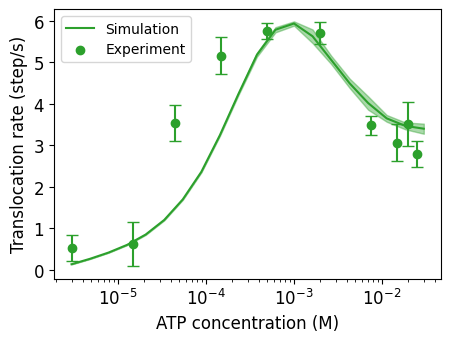

In [7]:
# plot the translocation rate - ATP concentration curve
trans_atp_avg=np.mean(trans_atp,axis=0)
trans_atp_std=np.std(trans_atp,axis=0)

c_atps_exp=np.array([3e-6,1.5e-5,4.5e-5,1.5e-4,5e-4,2e-3,7.5e-3,1.5e-2,2e-2,2.5e-2])
curve_atps_exp=np.array([1.0581,1.2448,7.0643,10.3320,11.5145,11.4212,6.9710,6.1307,7.0332,5.6017])/2
err_atps_exp=np.array([0.6287,1.0778,0.8683,0.8992,0.3892,0.5389,0.4491,0.8982,1.0778,0.6287])/2

plt.figure(figsize=(5,3.5))
plt.plot(c_atps,trans_atp_avg,color='tab:green',label='Simulation')
plt.fill_between(c_atps,trans_atp_avg-trans_atp_std,trans_atp_avg+trans_atp_std,color='tab:green',alpha=0.4)

plt.scatter(c_atps_exp,curve_atps_exp,color='tab:green',label='Experiment')
plt.errorbar(c_atps_exp,curve_atps_exp,err_atps_exp,capsize=4,color='tab:green',linestyle='none')
plt.xscale('log')
plt.xlabel('ATP concentration (M)')
plt.ylabel('Translocation rate (step/s)')
plt.legend()

# plt.savefig('pic/ATP.png',dpi=300,bbox_inches='tight')
# plt.savefig('pic/ATP.pdf',bbox_inches='tight')

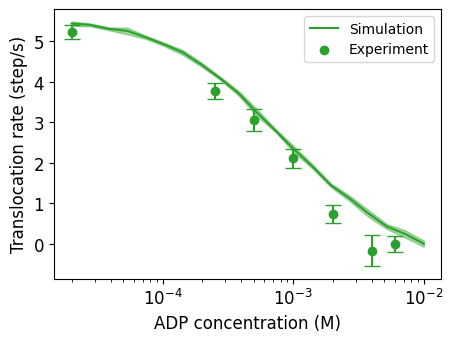

In [8]:
# plot the translocation rate - ADP concentration curve
trans_adp_avg=np.mean(trans_adp,axis=0)
trans_adp_std=np.std(trans_adp,axis=0)

c_adps_exp=np.array([2e-5,2.5e-4,5e-4,1e-3,2e-3,4e-3,6e-3])
curve_adps_exp=np.array([10.4543,7.5316,6.0984,4.2155,1.4895,-0.3372,0.0000])/2
err_adps_exp=np.array([0.3628,0.3907,0.5302,0.4744,0.4465,0.7814,0.3907])/2

plt.figure(figsize=(5,3.5))
plt.plot(c_adps,trans_adp_avg,color='tab:green',label='Simulation')
plt.fill_between(c_adps,trans_adp_avg-trans_adp_std,trans_adp_avg+trans_adp_std,color='tab:green',alpha=0.4)

plt.scatter(c_adps_exp,curve_adps_exp,color='tab:green',label='Experiment')
plt.errorbar(c_adps_exp,curve_adps_exp,err_adps_exp,capsize=6,color='tab:green',linestyle='none')
plt.xscale('log')
plt.xlabel('ADP concentration (M)')
plt.ylabel('Translocation rate (step/s)')
plt.legend()

# plt.savefig('pic/ADP.png',dpi=300,bbox_inches='tight')
# plt.savefig('pic/ADP.pdf',bbox_inches='tight')

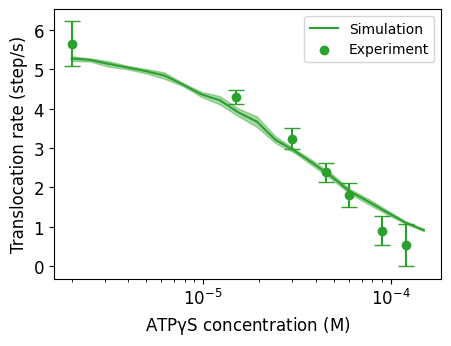

In [9]:
# plot the translocation rate - ATPgS concentration curve under a lower ATP concentration
trans_atpgs_avg=np.mean(trans_atpgs,axis=0)
trans_atpgs_std=np.std(trans_atpgs,axis=0)

c_atpgss_exp=np.array([2e-6,1.5e-5,3e-5,4.5e-5,6e-5,9e-5,1.2e-4])
curve_atpgss_exp=np.array([11.3155,8.5984,6.4831,4.7636,3.6262,1.8007,1.0606])/2
err_atpgss_exp=np.array([1.1282,0.3333,0.5128,0.4872,0.6154,0.7436,1.0770])/2

plt.figure(figsize=(5,3.5))
plt.plot(c_atpgss,trans_atpgs_avg,color='tab:green',label='Simulation')
plt.fill_between(c_atpgss,trans_atpgs_avg-trans_atpgs_std,trans_atpgs_avg+trans_atpgs_std,color='tab:green',alpha=0.4)

plt.scatter(c_atpgss_exp,curve_atpgss_exp,color='tab:green',label='Experiment')
plt.errorbar(c_atpgss_exp,curve_atpgss_exp,err_atpgss_exp,capsize=6,color='tab:green',linestyle='none')
plt.xscale('log')
plt.xlabel(r'ATP$\rm\gamma$S concentration (M)')
plt.ylabel('Translocation rate (step/s)')
plt.legend()

# plt.savefig('pic/ATPgS1.png',dpi=300,bbox_inches='tight')
# plt.savefig('pic/ATPgS1.pdf',bbox_inches='tight')

Text(0, 0.5, 'Translocation rate (step/s)')

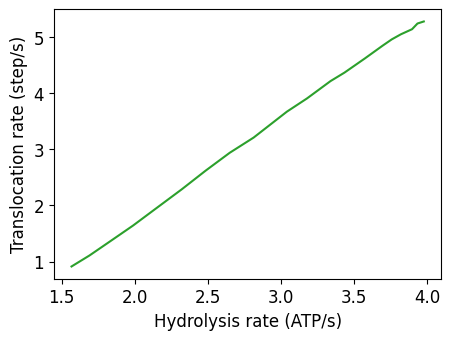

In [10]:
# plot the translocation rate - ATP hydrolysis rate curve when ATPgS concentration changing under a lower ATP concentration
trans_atpgs_avg=np.mean(trans_atpgs,axis=0)
trans_atpgs_std=np.std(trans_atpgs,axis=0)
hydr_atpgs_avg=np.mean(hydr_atpgs,axis=0)
hydr_atpgs_std=np.std(hydr_atpgs,axis=0)

plt.figure(figsize=(5,3.5))
plt.plot(hydr_atpgs_avg,trans_atpgs_avg,color='tab:green')
plt.xlabel('Hydrolysis rate (ATP/s)')
plt.ylabel('Translocation rate (step/s)')

# plt.savefig('pic/ATPgS1_2.png',dpi=300,bbox_inches='tight')
# plt.savefig('pic/ATPgS1_2.pdf',bbox_inches='tight')

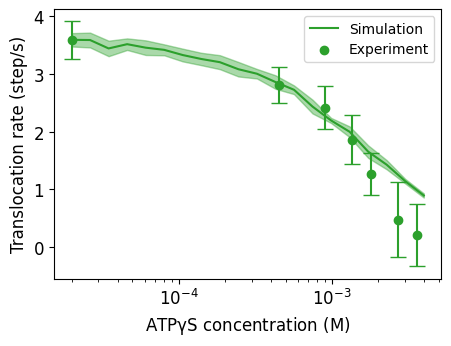

In [11]:
# plot the translocation rate - ATPgS concentration curve under a higher ATP concentration
trans_atpgs2_avg=np.mean(trans_atpgs2,axis=0)
trans_atpgs2_std=np.std(trans_atpgs2,axis=0)

c_atpgss_exp2=np.array([2e-5,4.5e-4,9e-4,1.35e-3,1.8e-3,2.7e-3,3.6e-3])
curve_atpgss_exp2=np.array([7.1741,5.6032,4.8259,3.7247,2.5263,0.9555,0.4211])/2
err_atpgss_exp2=np.array([0.6437,0.6284,0.7510,0.8582,0.7203,1.2874,1.0881])/2

plt.figure(figsize=(5,3.5))
plt.plot(c_atpgss2,trans_atpgs2_avg,color='tab:green',label='Simulation')
plt.fill_between(c_atpgss2,trans_atpgs2_avg-trans_atpgs2_std,trans_atpgs2_avg+trans_atpgs2_std,color='tab:green',alpha=0.4)

plt.scatter(c_atpgss_exp2,curve_atpgss_exp2,color='tab:green',label='Experiment')
plt.errorbar(c_atpgss_exp2,curve_atpgss_exp2,err_atpgss_exp2,capsize=6,color='tab:green',linestyle='none')
plt.xscale('log')
plt.xlabel(r'ATP$\rm\gamma$S concentration (M)')
plt.ylabel('Translocation rate (step/s)')
plt.legend()

# plt.savefig('pic/ATPgS2.png',dpi=300,bbox_inches='tight')
# plt.savefig('pic/ATPgS2.pdf',bbox_inches='tight')

Text(0, 0.5, 'Translocation rate (step/s)')

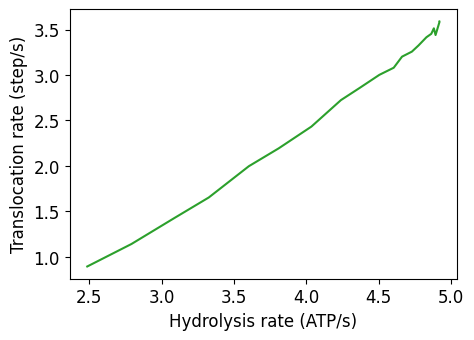

In [12]:
# plot the translocation rate - ATP hydrolysis rate curve when ATPgS concentration changing under a higher ATP concentration
trans_atpgs2_avg=np.mean(trans_atpgs2,axis=0)
trans_atpgs2_std=np.std(trans_atpgs2,axis=0)
hydr_atpgs2_avg=np.mean(hydr_atpgs2,axis=0)
hydr_atpgs2_std=np.std(hydr_atpgs2,axis=0)

plt.figure(figsize=(5,3.5))
plt.plot(hydr_atpgs2_avg,trans_atpgs2_avg,color='tab:green')
plt.xlabel('Hydrolysis rate (ATP/s)')
plt.ylabel('Translocation rate (step/s)')

# plt.savefig('pic/ATPgS2_2.png',dpi=300,bbox_inches='tight')
# plt.savefig('pic/ATPgS2_2.pdf',bbox_inches='tight')

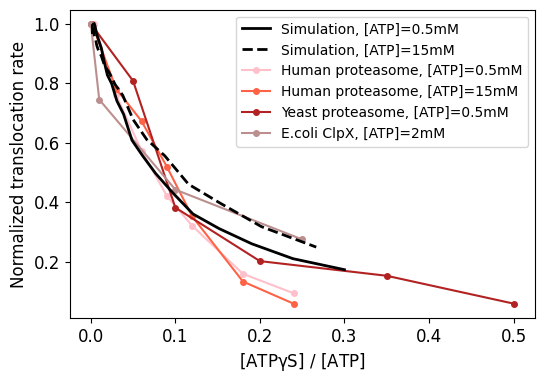

In [13]:
# compare the normalized translocation rate - ATPgS concentration curve with experiments
trans_atpgs_avg=np.mean(trans_atpgs,axis=0)
trans_atpgs2_avg=np.mean(trans_atpgs2,axis=0)

c_atp_exp1=5e-4
c_atpgss_exp1=np.array([2e-6,1.5e-5,3e-5,4.5e-5,6e-5,9e-5,1.2e-4])
curve_atpgss_exp1=np.array([11.3155,8.5984,6.4831,4.7636,3.6262,1.8007,1.0606])/2

c_atp_exp2=15e-3
c_atpgss_exp2=np.array([2e-5,4.5e-4,9e-4,1.35e-3,1.8e-3,2.7e-3,3.6e-3])
curve_atpgss_exp2=np.array([7.1741,5.6032,4.8259,3.7247,2.5263,0.9555,0.4211])/2

c_atp_exp3=5e-4
c_atpgss_exp3=np.array([0.0,25.0,50.0,100.0,175.0,250.0])*1e-6
curve_atpgss_exp3=np.array([8.423,6.805,3.216,1.701,1.286,0.498])

c_atp_exp4=2e-3
c_atpgss_exp4=np.array([0.0,20.0,200.0,500.0])*1e-6
curve_atpgss_exp4=np.array([98.942,73.721,43.763,27.190])

plt.figure(figsize=(6,4))
plt.plot(c_atpgss/5e-4,trans_atpgs_avg/np.max(trans_atpgs_avg),zorder=10,linewidth=2,color='black',label='Simulation, [ATP]=0.5mM')
plt.plot(c_atpgss2/15e-3,trans_atpgs2_avg/np.max(trans_atpgs2_avg),'--',zorder=10,linewidth=2,color='black',label='Simulation, [ATP]=15mM')

plt.plot(c_atpgss_exp1/c_atp_exp1,curve_atpgss_exp1/np.max(curve_atpgss_exp1),'-o',ms=4,color='pink',label='Human proteasome, [ATP]=0.5mM')
plt.plot(c_atpgss_exp2/c_atp_exp2,curve_atpgss_exp2/np.max(curve_atpgss_exp2),'-o',ms=4,color='tomato',label='Human proteasome, [ATP]=15mM')
plt.plot(c_atpgss_exp3/c_atp_exp3,curve_atpgss_exp3/np.max(curve_atpgss_exp3),'-o',ms=4,color='firebrick',label='Yeast proteasome, [ATP]=0.5mM')
plt.plot(c_atpgss_exp4/c_atp_exp4,curve_atpgss_exp4/np.max(curve_atpgss_exp4),'-o',ms=4,color='rosybrown',label='E.coli ClpX, [ATP]=2mM')
plt.xlabel(r'$\rm [ATP\gamma S]\ /\ [ATP]$')
plt.ylabel('Normalized translocation rate')
plt.legend()

# plt.savefig('pic/ATPgS_compare.png',dpi=300,bbox_inches='tight')
# plt.savefig('pic/ATPgS_compare.pdf',bbox_inches='tight')

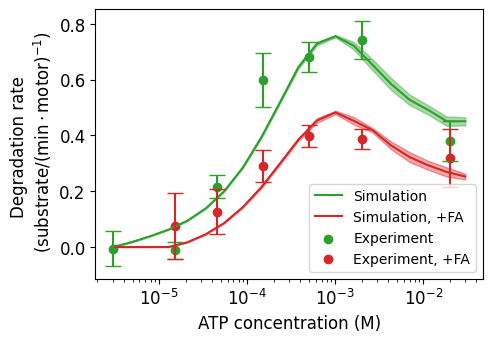

In [14]:
# plot the degradation rate - ATP concentration curve for diffenrent substrates
r_tr1=trans_atp_lobs
r_tr2=trans_atp_hobs

r_deg1=r_tr1*60/445
r_deg2=r_tr2*60/445

r_deg1_avg=np.clip(np.mean(r_deg1,axis=0),0,None)
r_deg2_avg=np.clip(np.mean(r_deg2,axis=0),0,None)
r_deg1_std=np.std(r_deg1,axis=0)
r_deg2_std=np.std(r_deg2,axis=0)

plt.figure(figsize=(5,3.5))

plt.plot(c_atps,r_deg1_avg,color='tab:green',label='Simulation')
plt.fill_between(c_atps,r_deg1_avg-r_deg1_std,r_deg1_avg+r_deg1_std,color='tab:green',alpha=0.4)

plt.plot(c_atps,r_deg2_avg,color='tab:red',label='Simulation, +FA')
plt.fill_between(c_atps,r_deg2_avg-r_deg2_std,r_deg2_avg+r_deg2_std,color='tab:red',alpha=0.4)

plt.scatter(np.array([3e-6,1.5e-5,4.5e-5,1.5e-4,5e-4,2e-3,2e-2]),np.array([-0.0068,-0.01179,0.2167,0.5986,0.6807,0.7419,0.3797]),color='tab:green',label='Experiment')
plt.errorbar(np.array([3e-6,1.5e-5,4.5e-5,1.5e-4,5e-4,2e-3,2e-2]),np.array([-0.0068,-0.01179,0.2167,0.5986,0.6807,0.7419,0.3797]),np.array([0.0627,0.0308,0.0411,0.0976,0.0548,0.0668,0.0702]),capsize=6,color='tab:green',linestyle='none')

plt.scatter(np.array([1.5e-5,4.5e-5,1.5e-4,5e-4,2e-3,2e-2]),np.array([0.0754,0.1261,0.2901,0.3983,0.3881,0.3187]),color='tab:red',label='Experiment, +FA')
plt.errorbar(np.array([1.5e-5,4.5e-5,1.5e-4,5e-4,2e-3,2e-2]),np.array([0.0754,0.1261,0.2901,0.3983,0.3881,0.3187]),np.array([0.1182,0.0805,0.0582,0.0394,0.0360,0.1045]),capsize=6,color='tab:red',linestyle='none')

plt.xscale('log')
plt.xlabel('ATP concentration (M)')
plt.ylabel('Degradation rate \n $\\rm (substrate/(min \cdot motor)^{-1})$')
plt.legend()

# plt.savefig('pic/folic_acid2.png',dpi=300,bbox_inches='tight')
# plt.savefig('pic/folic_acid2.pdf',bbox_inches='tight')

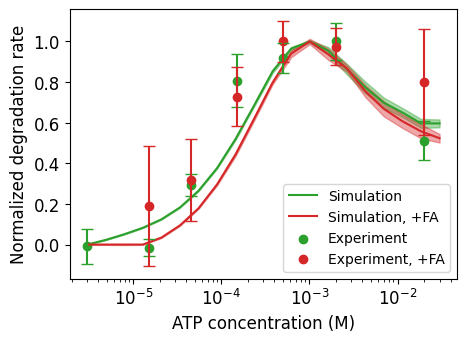

In [15]:
# plot the normalized degradation rate - ATP concentration curve for diffenrent substrates
r_tr1=trans_atp_lobs
r_tr2=trans_atp_hobs

r_deg1=r_tr1*60/445
r_deg2=r_tr2*60/445

r_deg1_avg=np.clip(np.mean(r_deg1,axis=0),0,None)
r_deg2_avg=np.clip(np.mean(r_deg2,axis=0),0,None)
r_deg1_std=np.std(r_deg1,axis=0)
r_deg2_std=np.std(r_deg2,axis=0)

plt.figure(figsize=(5,3.5))

plt.plot(c_atps,r_deg1_avg/r_deg1_avg.max(),color='tab:green',label='Simulation')
plt.fill_between(c_atps,(r_deg1_avg-r_deg1_std)/r_deg1_avg.max(),(r_deg1_avg+r_deg1_std)/r_deg1_avg.max(),color='tab:green',alpha=0.4)

plt.plot(c_atps,r_deg2_avg/r_deg2_avg.max(),color='tab:red',label='Simulation, +FA')
plt.fill_between(c_atps,(r_deg2_avg-r_deg2_std)/r_deg2_avg.max(),(r_deg2_avg+r_deg2_std)/r_deg2_avg.max(),color='tab:red',alpha=0.4)

plt.scatter(np.array([3e-6,1.5e-5,4.5e-5,1.5e-4,5e-4,2e-3,2e-2]),np.array([-0.0068,-0.01179,0.2167,0.5986,0.6807,0.7419,0.3797])/0.7419,color='tab:green',label='Experiment')
plt.errorbar(np.array([3e-6,1.5e-5,4.5e-5,1.5e-4,5e-4,2e-3,2e-2]),np.array([-0.0068,-0.01179,0.2167,0.5986,0.6807,0.7419,0.3797])/0.7419,np.array([0.0627,0.0308,0.0411,0.0976,0.0548,0.0668,0.0702])/0.7419,capsize=4,color='tab:green',linestyle='none')

plt.scatter(np.array([1.5e-5,4.5e-5,1.5e-4,5e-4,2e-3,2e-2]),np.array([0.0754,0.1261,0.2901,0.3983,0.3881,0.3187])/0.3983,color='tab:red',label='Experiment, +FA')
plt.errorbar(np.array([1.5e-5,4.5e-5,1.5e-4,5e-4,2e-3,2e-2]),np.array([0.0754,0.1261,0.2901,0.3983,0.3881,0.3187])/0.3983,np.array([0.1182,0.0805,0.0582,0.0394,0.0360,0.1045])/0.3983,capsize=4,color='tab:red',linestyle='none')

plt.xscale('log')
plt.xlabel('ATP concentration (M)')
plt.ylabel('Normalized degradation rate')
plt.legend()

# plt.savefig('pic/folic_acid2_norm.png',dpi=300,bbox_inches='tight')
# plt.savefig('pic/folic_acid2_norm.pdf',bbox_inches='tight')

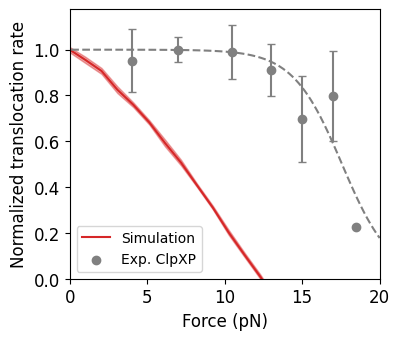

In [16]:
# plot the normalized translocation rate - force curve
trans_force_avg=np.mean(trans_force,axis=0)
trans_force_std=np.std(trans_force,axis=0)
mask=trans_force_avg>=-2.0
trans_force_avg=trans_force_avg[mask]
trans_force_std=trans_force_std[mask]

force_clpx=np.array([4.0,7.0,10.5,13.0,15.0,17.0,18.5])
trans_avg_clpx=np.array([6.094,6.400,6.329,5.835,4.471,5.106,1.459])/6.400
trans_std_clpx=np.array([0.871,0.353,0.753,0.730,1.20,1.247,0.020])/6.400

# func_fit=lambda f,a,b: 1-a*np.exp(b*f)
func_fit=lambda f,a,b: (1+a)/(1+a*np.exp(b*f/4.1))
para,_=optimize.curve_fit(func_fit,force_clpx,trans_avg_clpx)
f_fit=np.linspace(0.1,20,100)

plt.figure(figsize=(4,3.5))

plt.plot(e_subs[mask]/0.144/0.7,trans_force_avg/np.max(trans_force_avg),color='tab:red',label='Simulation')
plt.fill_between(e_subs[mask]/0.144/0.7,(trans_force_avg-trans_force_std)/np.max(trans_force_avg),(trans_force_avg+trans_force_std)/np.max(trans_force_avg),color='tab:red',alpha=0.4)

plt.scatter(force_clpx,trans_avg_clpx,color='grey',label='Exp. ClpXP')
plt.errorbar(force_clpx,trans_avg_clpx,trans_std_clpx,capsize=3,color='grey',linestyle='none')

plt.plot(f_fit,func_fit(f_fit,*para),color='grey',linestyle='--')

plt.xlabel('Force (pN)')
plt.ylabel('Normalized translocation rate')
plt.xlim(0,20)
plt.ylim(0,None)
plt.legend()

# plt.savefig('pic/force_norm.png',dpi=300,bbox_inches='tight')
# plt.savefig('pic/force_norm.pdf',bbox_inches='tight')

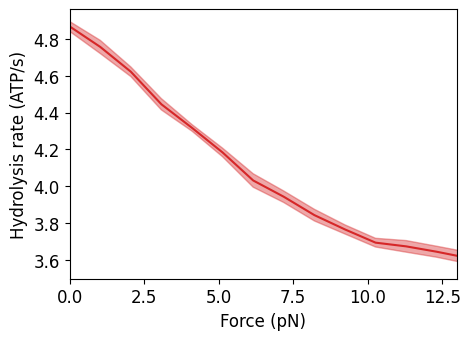

In [17]:
# plot the ATP hydrolysis rate - force curve
hydr_force_avg=np.mean(hydr_force,axis=0)
hydr_force_std=np.std(hydr_force,axis=0)
mask=hydr_force_avg>=-0.1
hydr_force_avg=hydr_force_avg[mask]
hydr_force_std=hydr_force_std[mask]

plt.figure(figsize=(5,3.5))
plt.plot(e_subs[mask]/0.144/0.7,hydr_force_avg,color='tab:red')
plt.fill_between(e_subs[mask]/0.144/0.7,hydr_force_avg-hydr_force_std,hydr_force_avg+hydr_force_std,color='tab:red',alpha=0.4)
plt.xlabel('Force (pN)')
plt.ylabel('Hydrolysis rate (ATP/s)')
plt.xlim(0,13)
_=plt.xticks(np.arange(0,13,2.5))

# plt.savefig('pic/force_hydrolysis.png',dpi=300,bbox_inches='tight')
# plt.savefig('pic/force_hydrolysis.pdf',bbox_inches='tight')

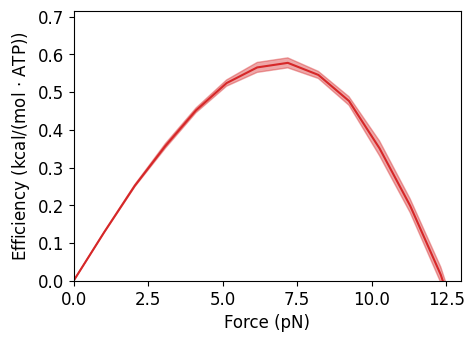

In [18]:
# plot the efficiency - force curve
effic_avg=np.mean(trans_force*e_subs/hydr_force,axis=0)
effic_std=np.std(trans_force*e_subs/hydr_force,axis=0)
mask=effic_avg>=-2.0
effic_avg=effic_avg[mask]
effic_std=effic_std[mask]

plt.figure(figsize=(5,3.5))
plt.plot(e_subs[mask]/0.144/0.7,effic_avg,color='tab:red')
plt.fill_between(e_subs[mask]/0.144/0.7,effic_avg-effic_std,effic_avg+effic_std,color='tab:red',alpha=0.4)
plt.xlabel('Force (pN)')
plt.ylabel(r'Efficiency (kcal/(mol $\cdot$ ATP))')
plt.xlim(0,13)
plt.ylim(0,None)
_=plt.xticks(np.arange(0,13,2.5))

# plt.savefig('pic/force_efficiency.png',dpi=300,bbox_inches='tight')
# plt.savefig('pic/force_efficiency.pdf',bbox_inches='tight')